In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 3: The Palmer Archipelago Penguin Data

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# drop rows with missing values
data.dropna(axis=0, how='any', inplace=True)

In [4]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
# feature matrix X
X = data.drop(['species','island', 'sex'],axis=1)

**Part 1:** Cluster the penguins using k-means.
Ensure that you have selected a good number of clusters (using the "elbow" method or the "silhouette score", for example).

c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

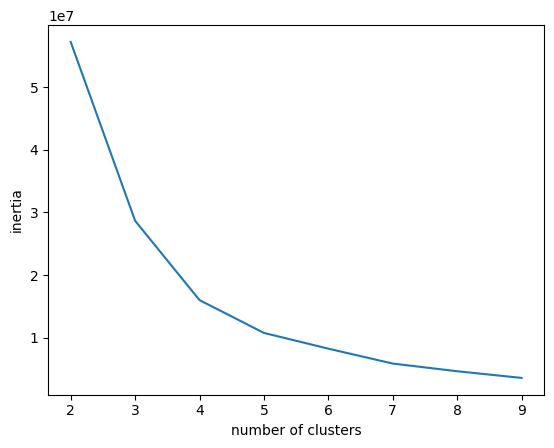

c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

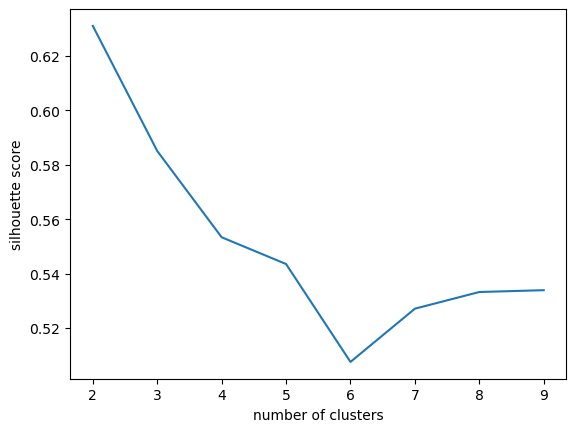

In [11]:
# **Part 1:** Cluster the penguins using k-means.
# Ensure that you have selected a good number of clusters (using the "elbow" method or the "silhouette score", for example).

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# elbow method
inertia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(2,10),inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

# silhouette score
silhouette = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    silhouette.append(silhouette_score(X,kmeans.labels_))
plt.plot(range(2,10),silhouette)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

**Part 2:** Analyze the obtained clusters

c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


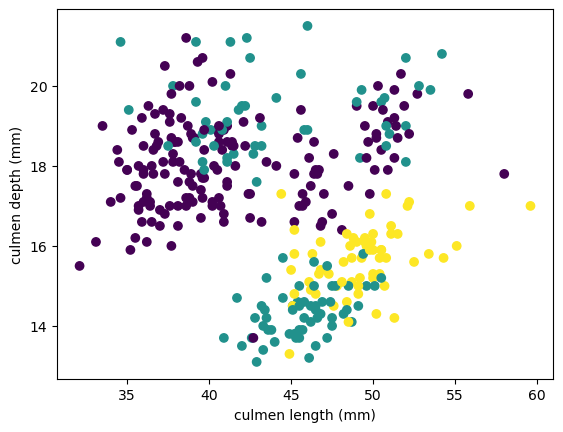

In [14]:
# **Part 2:** Analyze the obtained clusters

clusters = KMeans(n_clusters=3, random_state=0).fit_predict(X)
data['cluster'] = clusters

# plot the clusters
plt.scatter(data['culmen_length_mm'],data['culmen_depth_mm'],c=data['cluster'])
plt.xlabel('culmen length (mm)')
plt.ylabel('culmen depth (mm)')
plt.show()